# Work on your Data Story

The instructions from the course are as follows:

How does one go about creating a data story? You have some pointers from the material you've just gone through, but they’re probably a bit on the abstract side when you’re just getting started. Also, storytelling is an art, so you have to get your imagination going. Here are some pointers to get those creative juices flowing. In the following sections we will work step-by-step to create your first Data Story
1. Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.
2. Get going by asking the following questions and looking for the answers with some code and plots:
    3. Can you count something interesting?
    4. Can you find some trends (high, low, increase, decrease, anomalies)?
    5. Can you make a bar plot or a histogram?
    6. Can you compare two related quantities?
    7. Can you make a scatterplot?
    8. Can you make a time-series plot?

Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?
By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

# Information given by Kaggle

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Data Fields

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# import scipy and statsmodels libraries to use inbuild stats functions
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

# read the csv file with bosy temperatures
df = pd.read_csv('data/train.csv')

In [2]:
# first look at the dataset
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [3]:
# get the total number of rows and culumns
df.shape

(10886, 12)

In [4]:
# descriptive statistics
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


The dataset has 10886 rows which is much mroe than the minimum 30 required for analysis but also less than 10% of the total population. We can also infer that the data collection is independent

Interesting findings:
* Average temperature is 20.5C which is quite good for cycling
* Real and actual feel for temperatures are similar
* There are more registered than casual users

Looking at the columns and initial analysis, I would make the following assumptions:
1. More people cycle in warmer temperatures(summer months) than colder 
    * positive correlation between temperature and count
2. There is no big difference between weekday and weekend use
3. More registered users will use the bike sharing scheme than casual
4. People will avoid cycling as humidity increases or windspeed increases
    * negative correlation between windspeed and count
    * negative correlation between humidity and count 

In [5]:
# get column names for further analysis
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
# find correlation between the columns
cols = ['count', 'temp', 'atemp', 'humidity', 'windspeed']
cols_corr = df[cols].corr()
cols_corr

,count,temp,atemp,humidity,windspeed
count,1.000000,0.394454,0.389784,-0.317371,0.101369
temp,0.394454,1.000000,0.984948,-0.064949,-0.017852
atemp,0.389784,0.984948,1.000000,-0.043536,-0.057473
humidity,-0.317371,-0.064949,-0.043536,1.000000,-0.318607
windspeed,0.101369,-0.017852,-0.057473,-0.318607,1.000000


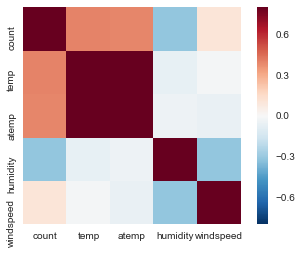

In [7]:
# visual representation of correlations using heatmap
sns.heatmap(cols_corr, square = True, vmax = 0.8 )

/Users/soumyakrishnamurthy/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


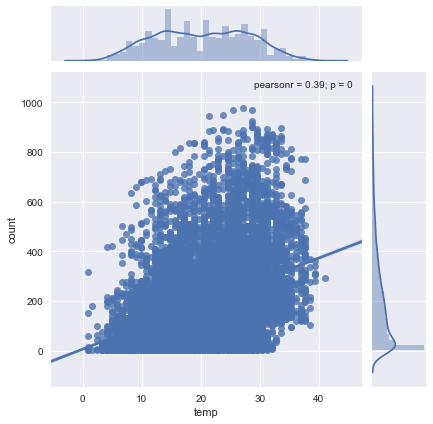

In [8]:
# use seaborn to plot the count against temperature to verify positive correlation
sns.jointplot(df['temp'], df['count'], kind='reg')

/Users/soumyakrishnamurthy/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


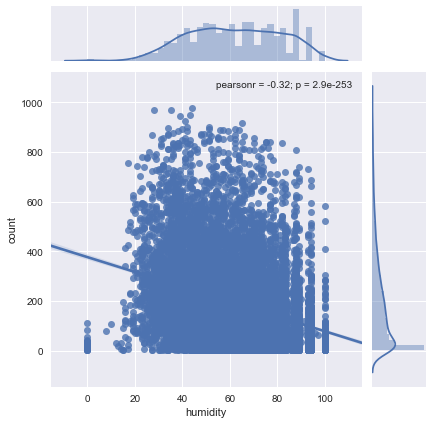

In [9]:
# use seaborn to plot the count against temperature to verify negative correlation
sns.jointplot(df['humidity'], df['count'], kind='reg')

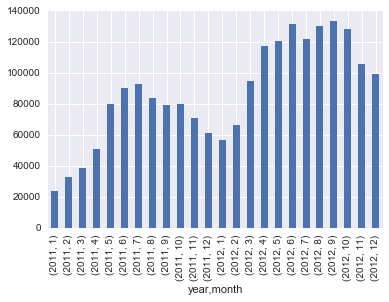

In [10]:
# parse timestamp 
dt = pd.DatetimeIndex(df['datetime'])
df['date'] = dt.date
df['day'] = dt.day
df['month'] = dt.month
df['year'] = dt.year
df['hour'] = dt.hour
df['dayofweek'] = dt.dayofweek

# plot total users by month and year
df.groupby(['year', 'month'])['count'].agg(sum).plot(kind = 'bar')

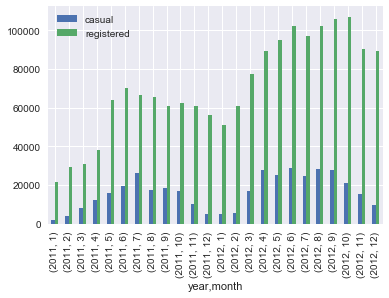

In [11]:
# breakup of data by month between casual and registered users 
df.groupby(['year', 'month'])['casual','registered'].agg(sum).plot(kind = 'bar')

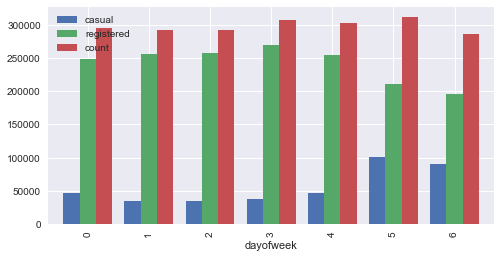

In [12]:
# breakup of data by hour between weekday and weekend 
dayofweek = df.groupby(['dayofweek'])['casual','registered','count'].agg(sum)
dayofweek.plot(kind = 'bar', figsize = (8,4), width = 0.8)

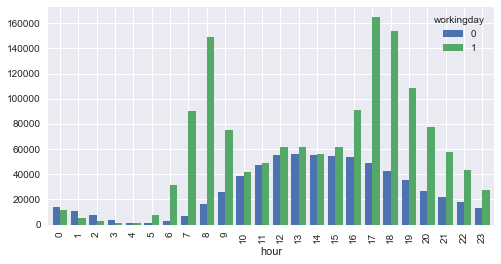

In [13]:
# breakup of data by hour between weekday (1) and weekend (0)
hourofday = df.groupby(['hour', 'workingday'])['count'].agg(sum).unstack()
hourofday.plot(kind = 'bar', figsize = (8,4), width = 0.8)

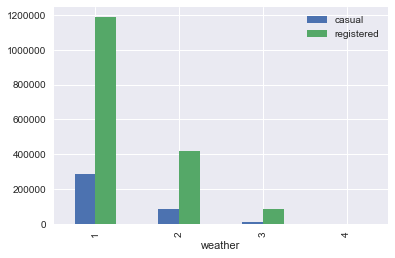

In [14]:
# breakup between casual and registerewd users based on weather -
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df.groupby(['weather'])['casual','registered'].agg(sum).plot(kind = 'bar')

In [15]:
# view the difference in a table
df.groupby(['weather'])['casual','registered'].agg(sum)

,casual,registered
weather,,
1,289900,1186163
2,87246,419914
3,14983,87106
4,6,158


In [16]:
# get the total number of good days vs bad days
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [19]:
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

Some findings are:
1. The weather is very conducive to cycling as indicated by the fact that ther numbers of good weather days are three time more likely
2. Temperature has a very clear positive correlation
3. Similarly humidity has a negative correlation but windspeed does not seem to have a negative correlation
4. More registered users use the scheme than casual users, but only at peak commute hours
5. Commute hours are most popular times of the day
6. Overall total rentals do not vary a lot between weekdays and weekends
7. There is a very good increase in total users between 2011 and 2012

It would be interesting to get the breakdown of users by age and gender

These findings can be used to predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.